In [2]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
#loading the dataset
movies=pd.read_csv('tmdb-movies.csv')
movies.head

<bound method NDFrame.head of            id    imdb_id  popularity     budget     revenue  \
0      135397  tt0369610   32.985763  150000000  1513528810   
1       76341  tt1392190   28.419936  150000000   378436354   
2      262500  tt2908446   13.112507  110000000   295238201   
3      140607  tt2488496   11.173104  200000000  2068178225   
4      168259  tt2820852    9.335014  190000000  1506249360   
...       ...        ...         ...        ...         ...   
10861      21  tt0060371    0.080598          0           0   
10862   20379  tt0060472    0.065543          0           0   
10863   39768  tt0060161    0.065141          0           0   
10864   21449  tt0061177    0.064317          0           0   
10865   22293  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                 

In [4]:
#statistic values for this data
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#check each column for unique values
movies.nunique()


id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
movies.drop(['id','imdb_id','homepage','overview'],axis=1,inplace=True)
movies.fillna(movies.mean(),inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   tagline               8042 non-null   object 
 7   keywords              9373 non-null   object 
 8   runtime               10866 non-null  int64  
 9   genres                10843 non-null  object 
 10  production_companies  9836 non-null   object 
 11  release_date          10866 non-null  object 
 12  vote_count            10866 non-null  int64  
 13  vote_average          10866 non-null  float64
 14  release_year          10866 non-null  int64  
 15  budget_adj         

In [7]:
#drop null values for each column containing null values
movies.dropna(inplace=True)
movies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            7032 non-null   float64
 1   budget                7032 non-null   int64  
 2   revenue               7032 non-null   int64  
 3   original_title        7032 non-null   object 
 4   cast                  7032 non-null   object 
 5   director              7032 non-null   object 
 6   tagline               7032 non-null   object 
 7   keywords              7032 non-null   object 
 8   runtime               7032 non-null   int64  
 9   genres                7032 non-null   object 
 10  production_companies  7032 non-null   object 
 11  release_date          7032 non-null   object 
 12  vote_count            7032 non-null   int64  
 13  vote_average          7032 non-null   float64
 14  release_year          7032 non-null   int64  
 15  budget_adj          

In [8]:
#to replace all the zero value in column with mean value
movies['popularity']=movies['popularity'].replace(0,movies['popularity'].mean())
movies['revenue']=movies['revenue'].replace(0,movies['revenue'].mean())
movies['runtime']=movies['runtime'].replace(0,movies['runtime'].mean())
movies['budget_adj']=movies['budget_adj'].replace(0,movies['budget_adj'].mean())
movies['revenue_adj']=movies['revenue_adj'].replace(0,movies['revenue_adj'].mean())
movies.describe()


,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,7032.000000,7.032000e+03,7.032000e+03,7032.000000,7032.000000,7032.000000,7032.000000,7.032000e+03,7.032000e+03
mean,0.829463,2.084426e+07,8.339878e+07,104.882895,312.684300,6.013239,1999.383817,3.484685e+07,1.074617e+08
std,1.180185,3.602117e+07,1.330625e+08,23.704753,693.182087,0.876516,13.468216,3.492787e+07,1.631156e+08
min,0.000188,0.000000e+00,2.000000e+00,4.000000,10.000000,1.500000,1960.000000,9.693980e-01,2.861934e+00
25%,0.278573,0.000000e+00,2.824752e+07,92.000000,24.000000,5.500000,1992.000000,2.037761e+07,3.923478e+07
50%,0.506241,5.000000e+06,5.931630e+07,101.000000,73.000000,6.100000,2003.000000,2.500950e+07,7.643072e+07
75%,0.956217,2.600000e+07,5.931630e+07,114.000000,263.000000,6.600000,2010.000000,3.463336e+07,7.643072e+07
max,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
#calculate sum of all duplicated values
movies.duplicated().sum()

1

In [10]:
#drop duplicate values
movies.drop_duplicates(inplace=True)
movies.duplicated().sum()

0

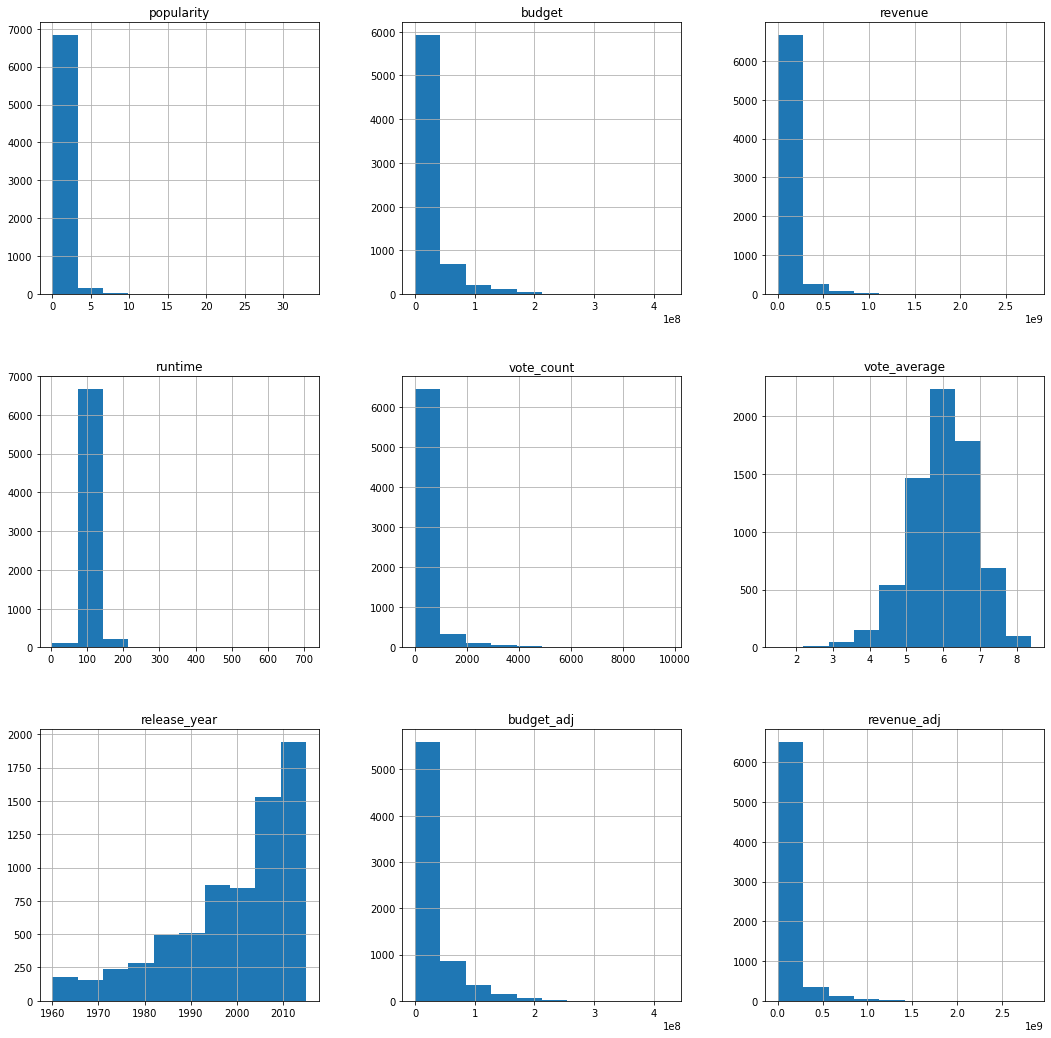

In [11]:
#visulize each variable
movies.hist(figsize=(18,18));

Text(0, 0.5, 'popularity')

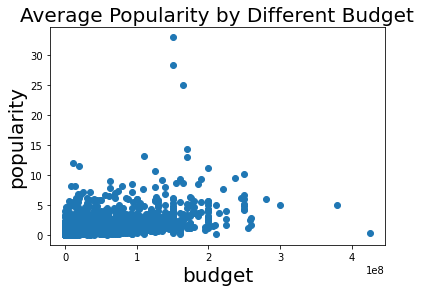

In [12]:
# QUESTION 1 (Does higher budget mean higher popularity ? )

# ploting relationship between bidget and popularity

x=movies['budget']
y=movies['popularity']

plt.scatter(x,y)
plt.title('Average Popularity by Different Budget',fontsize=20)
plt.xlabel('budget',fontsize=20)
plt.ylabel('popularity',fontsize=20)

In [13]:
#as the plot is very difficult to observe srtong relationship between popularity and budget we use differnet approach 
#by dividing the dataset into two groups on the basis of median

#divide the budget into two groups: lesser_cost and more_cost

med=movies['budget'].median()
lesser_cost=movies.query('budget < {}'.format(med))
more_cost=movies.query('budget >={}'.format(med))

In [14]:
# checking mean popularity of lesser_cost and more_cost
mean_low_budget=lesser_cost['popularity'].mean()
mean_high_budget=more_cost['popularity'].mean()

Text(0, 0.5, 'mean popularity')

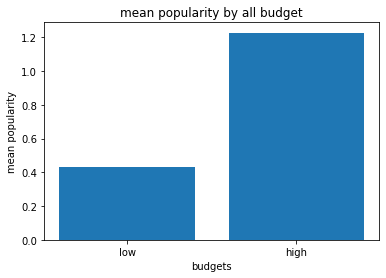

In [15]:
#create bar chart 
locations=[1,2]
height=[mean_low_budget,mean_high_budget]
labels=['low','high']
plt.bar(locations,height,tick_label = labels)
plt.title('mean popularity by all budget')
plt.xlabel('budgets')
plt.ylabel('mean popularity')

In [16]:
#QUESTION 2  (Do runtime efect the popularity?)

#splitting the run time into 3 groups 
lowest=movies.query('runtime <{}'.format(100))
med=movies.query('runtime <{}'.format(200))
highest=movies.query('runtime >{}'.format(200))

In [17]:
#check mean popularity of diiferent movie lengths

mean_of_lowest=lowest['popularity'].mean()
mean_of_med=med['popularity'].mean()
mean_of_highest=highest['popularity'].mean()


Text(0, 0.5, 'Average popularity')

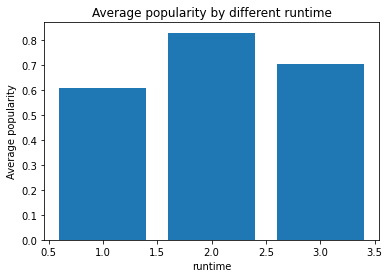

In [22]:
locations=[1,2,3]
heights=[mean_of_lowest,mean_of_med,mean_of_highest]

plt.bar(locations,heights)
plt.title('Average popularity by different runtime')
plt.xlabel('runtime')
plt.ylabel('Average popularity')

Text(0, 0.5, 'Average popularity')

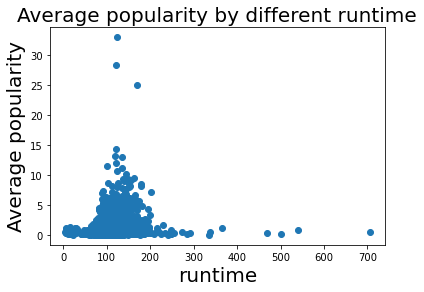

In [23]:
x=movies['runtime']
y=movies['popularity']
plt.scatter(x,y)
plt.title('Average popularity by different runtime',fontsize=20)
plt.xlabel('runtime',fontsize=20)
plt.ylabel('Average popularity',fontsize=20)


In [24]:
#QUESTION 3 (Is higher popularity mean higher profits)

#create new column called profit
movies['profit']=movies['revenue']-movies['budget']

Text(0, 0.5, 'profit')

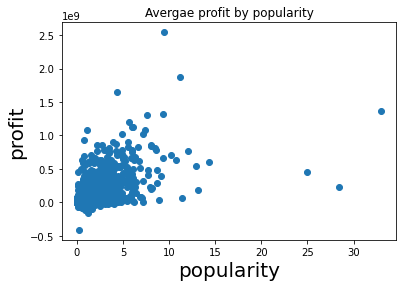

In [25]:
x= movies['popularity']
y=movies['profit']

plt.scatter(x,y)
plt.title('Avergae profit by popularity')
plt.xlabel('popularity',fontsize=20)
plt.ylabel('profit',fontsize=20)